In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Data Generating Process

<span style="font-size:1.2em; line-height:0%">
$$
\begin{align}
    \mu_{\rm parent} \sim \mathcal{N}(\mu_{\rm root}, \sigma^2_{\rm node})\\
    \mu_{\rm child} \sim \mathcal{N}(\mu_{\rm parent}, \sigma^2_{\rm node}) \\
    x_{d, i} \sim \mathcal{N}(\mu_{\rm child}, \sigma^2_{\rm data})
\end{align}
$$
</span>

In [3]:
num_data = 50 ; dims=2

In [4]:
sigma_node = np.array([1.2, 1.5])
sigma_data = np.array([1.5, 0.2])

In [5]:
mu_parent = npr.normal(loc=np.array([3,-2]), scale=sigma_node)

In [6]:
mu_parent

array([ 3.52406255,  1.00718061])

In [7]:
mu_child = npr.normal(loc=mu_parent,  scale=sigma_node)

In [8]:
mu_child

array([ 3.0812901 ,  2.50584879])

In [9]:
x = npr.normal(loc=mu_child,  scale=sigma_data, size=(num_data,dims))

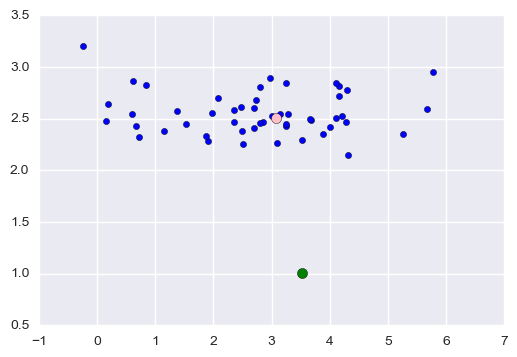

In [10]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(mu_parent[0], mu_parent[1], s=53, c="green")
plt.scatter(mu_child[0], mu_child[1], s=53, c="pink")

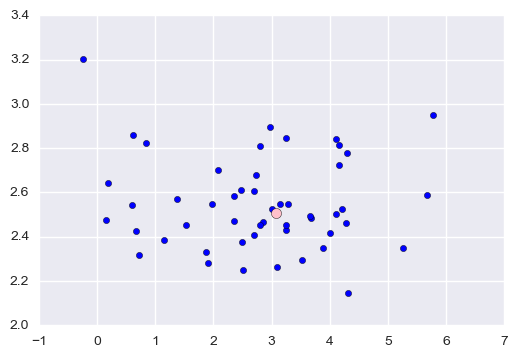

In [11]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(mu_child[0], mu_child[1], s=53, c="pink")

# Sampling

分散は他のところでサンプリングしているので、ここでする必要はない

[参考](https://shusei-e.github.io/bayesian%20analysis/BayesianMultipleRegression/): (2)式

<span style="font-size:1.2em; line-height:0%">
$$
\begin{align}
&\log \left[ p(\mu_c | \mu_p, \sigma^2_n, \sigma^2_d, x ) \right]\\
&\propto \log \left[ p(\mu_c | \mu_p, \sigma^2_n) \prod_N p(x_i | \mu_c, \sigma^2_d) \right] \\
&= -\frac{1}{2}\log (2 \pi \sigma^2_n) - \frac{ (\mu_c - \mu_p)^2}{2 \sigma^2_n} + \sum_N \left[ - \frac{1}{2} \log (2 \pi \sigma^2_d ) - \frac{(x_i - \mu_c)^2}{2 \sigma^2_d} \right]\\
&\propto  - \frac{ (\mu_c - \mu_p)^2}{2 \sigma^2_n} + \sum_N \left[ - \frac{(x_i - \mu_c)^2}{2 \sigma^2_d} \right]\\
&= - \frac{\mu_c^2}{2 \sigma^2_n} + \frac{1}{\sigma^2_n} \mu_c \mu_p + \sum_N \left[ - \frac{x_i^2}{2 \sigma^2_d} + \frac{1}{\sigma^2_d} x_i \mu_c - \frac{\mu_c^2}{2 \sigma^2_d} \right]\\
&= - \frac{\mu_c^2}{2 \sigma^2_n} + \frac{1}{\sigma^2_n} \mu_c \mu_p + \sum_N \left[ - \frac{x_i^2}{2 \sigma^2_d} + \frac{1}{\sigma^2_d} x_i \mu_c  \right] - \frac{N \mu_c^2}{2 \sigma^2_d}\\
&\propto - \frac{\mu_c^2}{2 \sigma^2_n} + \frac{1}{\sigma^2_n} \mu_c \mu_p + \sum_N \left[  \frac{1}{\sigma^2_d} x_i \mu_c  \right] - \frac{N \mu_c^2}{2 \sigma^2_d} \\
&= - \frac{1}{2} \left( \frac{1}{\sigma^2_n}+ \frac{N}{\sigma^2_d} \right) \mu_c^2 + \frac{1}{\sigma^2_n} \mu_c \mu_p + \sum_N \left[  \frac{1}{\sigma^2_d} x_i \mu_c  \right] \\
&=  - \frac{1}{2} \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right) \mu_c^2 + \frac{1}{\sigma^2_n} \mu_c \mu_p + \sum_N \left[  \frac{1}{\sigma^2_d} x_i \mu_c  \right] \\
&= - \frac{1}{2} \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right) \mu_c^2 + \frac{1}{\sigma^2_n} \mu_c \mu_p + \frac{\mu_c}{\sigma^2_d} \sum_N   x_i \\
&= - \frac{1}{2} \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right) \mu_c^2  + \left[ \frac{1}{\sigma^2_n}  \mu_p +  \frac{1}{\sigma^2_d} \sum_N   x_i   \right] \mu_c \\
&= - \frac{1}{2} \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right) \mu_c^2  +   \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right)  \left( \frac{\sigma^2_n \sigma^2_d}{\sigma^2_d + N \sigma^2_n } \right)   \left[ \frac{1}{\sigma^2_n}  \mu_p +  \frac{1}{\sigma^2_d} \sum_N   x_i   \right] \mu_c \\
&= - \frac{1}{2} \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right) \mu_c^2  +   \left( \frac{\sigma^2_d + N \sigma^2_n }{\sigma^2_n \sigma^2_d} \right)  \left[ \frac{\sigma^2_d \mu_p}{\sigma^2_d + N \sigma^2_n}   +  \frac{\sigma_n^2 \sum_N   x_i }{\sigma^2_d + N \sigma^2_n}   \right] \mu_c \\
\end{align}
$$
</span>

In [12]:
numerator = (sigma_data**2) * (mu_parent)  + (sigma_node**2) * x.sum(axis=0) 
denominator = (sigma_data**2 + num_data * sigma_node**2) 

new_mu = numerator / denominator

new_mu

array([ 2.79406925,  2.54937573])

In [13]:
# true
mu_child

array([ 3.0812901 ,  2.50584879])

In [14]:
numerator_s = sigma_data**2 + num_data * sigma_node**2
denominator_s = sigma_data**2 * sigma_node**2
new_sigma = denominator_s / numerator_s  # 1/(numerator/denominator)
new_sigma

array([ 0.04363636,  0.00079972])

In [15]:
sampled_mu_c = npr.normal(new_mu, new_sigma, size=(1000,2))

In [16]:
np.mean(sampled_mu_c, axis=0)

array([ 2.79409418,  2.54937418])

# Variance

Seems unstable if data is small

[Conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior)  
[Inverse-Gamma](https://en.wikipedia.org/wiki/Inverse-gamma_distribution)

In [17]:
# Use Inverse-Gamma
from scipy.stats import invgamma

alpha = 1
beta = 1

alpha_new = alpha + 0.5 * num_data

scale_new = beta + 0.5 * np.power(( x - mu_child ), 2).sum(axis=0)

sampled_sigma = invgamma.rvs(a=alpha_new, scale=scale_new, size=(10,dims))
#np.sqrt(sampled_sigma.mean(axis=0))

In [18]:
np.sqrt(scale_new / (alpha_new + 1)) # mode

array([ 1.40790054,  0.28117998])

In [19]:
# True
sigma_data # variance = sigma^2

array([ 1.5,  0.2])

In [20]:
#sns.distplot(sampled_sigma[:, 0], hist=True, kde=False)